<a href="https://colab.research.google.com/github/eladiaza/VisionXComputador/blob/main/MatricesAImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import random

In [10]:
def crear_matriz(filas, columnas):
    matriz = []
    for i in range(filas):
        fila = []
        for j in range(columnas):
            fila.append(random.randint(0, 255))  # uint8
        matriz.append(fila)
    return matriz

matriz = crear_matriz(1000, 1000)

In [15]:
for fila in matriz[:10]:
    print(fila[:10])

[139, 59, 219, 255, 118, 150, 5, 18, 235, 243]
[134, 90, 73, 158, 183, 196, 16, 243, 48, 140]
[40, 195, 74, 234, 142, 121, 16, 146, 72, 240]
[86, 125, 113, 154, 151, 91, 78, 185, 112, 224]
[91, 137, 141, 215, 120, 167, 20, 119, 35, 0]
[83, 38, 169, 65, 168, 193, 126, 151, 119, 254]
[43, 44, 196, 94, 76, 226, 98, 71, 32, 106]
[177, 177, 217, 59, 95, 92, 108, 70, 9, 102]
[90, 147, 19, 78, 127, 132, 93, 68, 5, 73]
[186, 155, 241, 65, 6, 117, 212, 222, 72, 164]


In [20]:
import math

def estadisticas_matriz(matriz):
    total = 0
    contador = 0
    minimo = 255
    maximo = 0

    # Primera pasada: min, max, suma
    for fila in matriz:
        for valor in fila:
            total += valor
            contador += 1
            if valor < minimo:
                minimo = valor
            if valor > maximo:
                maximo = valor

    media = total / contador

    # Segunda pasada: desviación estándar
    suma_varianza = 0
    for fila in matriz:
        for valor in fila:
            suma_varianza += (valor - media) ** 2

    desviacion = math.sqrt(suma_varianza / contador)

    return minimo, maximo, media, desviacion


In [21]:
minimo, maximo, media, desviacion = estadisticas_matriz(matriz)

print("Mínimo:", minimo)
print("Máximo:", maximo)
print("Media:", media)
print("Desviación estándar:", desviacion)

Mínimo: 0
Máximo: 255
Media: 127.443455
Desviación estándar: 73.9092162768878


In [24]:
def aplanar_matriz(matriz):
    vector = []
    for fila in matriz:
        for valor in fila:
            vector.append(valor)
    return vector

vector = aplanar_matriz(matriz)
print("Longitud del vector:", len(vector))


Longitud del vector: 1000000


In [25]:
import time

#Tiempo de creación de la matriz
t0 = time.time()
matriz = crear_matriz(1000, 1000)
t1 = time.time()
tiempo_creacion = t1 - t0

#Tiempo de cálculo de estadísticas
t2 = time.time()
minimo, maximo, media, desviacion = estadisticas_matriz(matriz)
t3 = time.time()
tiempo_estadisticas = t3 - t2

#Tiempo de aplanado
t4 = time.time()
vector = aplanar_matriz(matriz)
t5 = time.time()
tiempo_aplanado = t5 - t4

#Tiempo total
tiempo_total = tiempo_creacion + tiempo_estadisticas + tiempo_aplanado

print("Tiempo creación matriz:", tiempo_creacion)
print("Tiempo estadísticas:", tiempo_estadisticas)
print("Tiempo aplanado:", tiempo_aplanado)
print("Tiempo total:", tiempo_total)


Tiempo creación matriz: 0.9997918605804443
Tiempo estadísticas: 0.2080836296081543
Tiempo aplanado: 0.018314123153686523
Tiempo total: 1.2261896133422852


In [27]:
with open("matriz_aplanada.txt", "w") as f:
    for v in vector:
        f.write(str(v) + "\n")


In [29]:
ruta = "/content/drive/MyDrive/VisionXComputador/matriz_aplanada.txt"

with open(ruta, "w") as f:
    for v in vector:
        f.write(str(v) + "\n")


In [30]:
ruta = "/content/drive/MyDrive/VisionXComputador/matriz_aplanada.txt"

vector_leido = []
with open(ruta, "r") as f:
    for linea in f:
        vector_leido.append(int(linea.strip()))

print("Elementos leídos:", len(vector_leido))


Elementos leídos: 1000000


In [31]:
import numpy as np

# Convertir a arreglo NumPy (uint8)
arr = np.array(vector_leido, dtype=np.uint8)

min_np = np.min(arr)
max_np = np.max(arr)
media_np = np.mean(arr)
desv_np = np.std(arr)

print("Min (NumPy):", min_np)
print("Max (NumPy):", max_np)
print("Media (NumPy):", media_np)
print("Desviación estándar (NumPy):", desv_np)


Min (NumPy): 0
Max (NumPy): 255
Media (NumPy): 127.479591
Desviación estándar (NumPy): 73.93142988927457


In [32]:
import time

t0 = time.time()

arr = np.array(vector_leido, dtype=np.uint8)
min_np = np.min(arr)
max_np = np.max(arr)
media_np = np.mean(arr)
desv_np = np.std(arr)

t1 = time.time()
tiempo_numpy = t1 - t0

print("Tiempo total con NumPy:", tiempo_numpy)


Tiempo total con NumPy: 0.053153038024902344


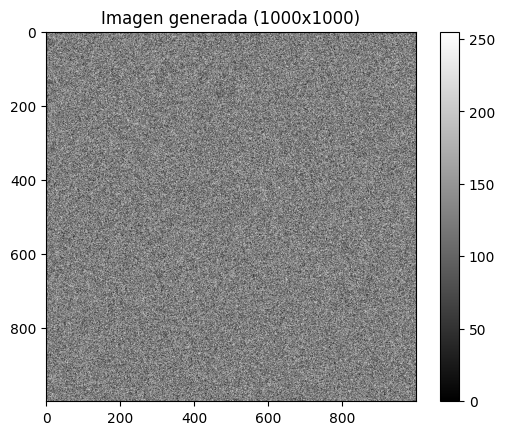

In [33]:
import matplotlib.pyplot as plt

imagen = arr.reshape((1000, 1000))

plt.imshow(imagen, cmap='gray')
plt.title("Imagen generada (1000x1000)")
plt.colorbar()
plt.show()
